<img align="center" style="max-width: 1000px" src="figures/banner.png">

<img align="right" style="max-width: 200px; height: auto" src="figures/hsg_logo.png">

##  Lab 03 - "Introduction to Pytorch"

Machine Learning, University of St. Gallen, Spring Term 2024

Objectives:

 - Become familiar with PyTorch
 - Understand the basics of automatic differentiation
 - Implement a simple linear model with `torch.nn`

## 1. Why Use Deep Learning Libraries?

Numpy is a powerful library for numerical computing and can be used to build and train neural networks from scratch. However, there are two significant limitations to using pure Numpy for deep learning:

1. Numpy does not provide built-in support for GPU acceleration.
2. Numpy does not offer automatic differentiation out of the box.

As a result, using Numpy for deep learning is not always the most efficient or practical option. Instead, frameworks like PyTorch have been designed to address these limitations and provide developers with powerful tools for building, training, and deploying deep neural networks.

##  2. Which Library to Use?

Some of the major libraries that we can use for deep learning are: PyTorch, Jax, TensorFlow and Chainer.

<img align="center" style="max-width: 800px" src="figures/dl_libraries.png">

Below we compare several features in these libraries:

| Feature        | PyTorch           | JAX               | TensorFlow 2.0    | Chainer           |
|----------------|-------------------|-------------------|-------------------|-------------------|
| Main Focus     | Deep Learning     | Numerical Computing| Deep Learning     | Deep Learning     |
| Backends | PyTorch | XLA, NumPy | TensorFlow | NumPy |
| Programming Language Support | Python | Python, Julia | Python | Python |
| GPU Support | Yes         | Yes         | Yes         | Yes         |
| Computation Graph | Dynamic           | Dynamic            | Dynamic (since version 2.0)            | Dynamic            |
| Auto Differentiation | Yes             | Yes               | Yes              | Yes               |
| APIs for Model Building | Torch.nn | Flax, Haiku | Keras, Estimators, Layers | Chainer.links, Chainer.functions |
| Distributed Training | Yes             | Yes                | Yes              | Yes                |
| Visualization   | TensorBoard       | No                | TensorBoard       | No                |
| Community       | Large, Active  | Small, Active   | Large, Active  | Small, Active   |
| Platform Support | Windows, Linux, macOS | Linux, macOS | Windows, Linux, macOS | Windows, Linux, macOS |
| Ease of Debugging | Good | Good | Okay | Okay |
| Mobile Deployment | PyTorch Mobile | No | TensorFlow Lite | ChainerX |
| Primary Developer| Meta AI (Gov. by Linux Foundations) |Google | Google |  Preferred Networks|


We will use PyTorch for our tutorials.

## 3. An Overview of the PyTorch Library

<img align="center" style="max-width: 600px" src="figures/pytorch_packages.jpeg">


+ `autograd`: This package is used for automatic differentiation. The autograd package is essential for training neural networks using backpropagation, as it allows users to easily compute gradients of the loss function with respect to the model parameters.

+ `nn`: This package provides a high-level API for building neural networks in PyTorch. It includes the most common types of layers such as convolutional layers, pooling layers, and linear layers, as well as activation functions and loss functions. The `nn` module also provides tools for building custom layers and models using PyTorch tensors.

+ `optim`: This package provides various optimization algorithms for training neural networks in PyTorch. It includes popular optimization methods such as Stochastic Gradient Descent (SGD), Adam, and Adagrad. The optim module also provides tools for customizing the learning rate and weight decay, as well as implementing learning rate schedulers.

+ `utils`: This package provides a variety of utility functions such as data loading and and visualization. For example, the `torch.utils.data` module contains classes and functions for loading and preprocessing data, and the `torch.utils.tensorboard` module provides support for visualizing training and validation metrics in via `TensorBoard`. 




## 4. Computational Graphs and Automatic Differentiation

In [1]:
import torch

#### 4.1 What are computational graphs and why do we need them?

A computational graph in a directed acyclic graph (DAG) that represents the flow of information through the network. It consists of nodes that represent mathematical operations and edges that represent the flow of data between the nodes.


Let's assume we have a very simple function:

$$f(x) = w \times x + b$$

Here $x$ is the input and $w$ and $b$ are (learnable) parameters. We want to change $w$ and $b$ such that the output of the function gets as close as possible to a target output (ground-truth). We (randomly) initialize $w=0.2$ and $b=0.0$.

Now let's calculate $f(0.4)$ in PyTorch:

In [2]:
# Example input and output
x = torch.tensor(0.4)  # input tensor
y = torch.tensor(1.0)  # expected output

# Initialize w and b with random value (here we set them to 0.2 and 0.0)
w = torch.tensor(0.2, requires_grad=True) # requires_grad=True -> learnable parameter
b = torch.tensor(0.0, requires_grad=True) # requires_grad=True -> learnable parameter

# Calculate f(x)
z = w * x + b

print(z)

tensor(0.0800, grad_fn=<AddBackward0>)


Let's assume we want $f(0.4)=1.0$, but currently  $f(0.4)=0.08$:

$$f(0.4) = 0.7 \rightarrow f(0.4) = 1.0$$

To do so, we first mesaure the difference between the desired output and the actual output of the function and we call it the loss ($l$):

$$l = ||f(0.4) - 1.0||_{2}^{2}$$

Then, to estimate the amount of required change in $w$ and $b$ to get closer to the desired value, we need to compute the gradients of the loss w.r.t. the functions parameters:

$$\frac{\partial l}{\partial w}, \frac{\partial l}{\partial b}$$

And finally update $w$ an $b$ using gradient descent:
$$w_{new} \leftarrow w - \alpha  \frac{\partial l}{\partial w}$$
$$b_{new} \leftarrow b - \alpha \frac{\partial l}{\partial b}$$

In [3]:
loss = torch.norm(z - y, p=2)

Running the tensor operations above creates the following computational graphs that enables automatic differentiation.

<img align="center" style="max-width: 500px" src="figures/comp-graph.png">
<sup> Image adapted from: <a href="https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html">https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html</a> <sup>

Technically, the computational graph of the function above is created dynamically or on-the-fly.

#### 4.2 Computing Gradients

Once the loss is computed and the computational graphs is formed (in the background), we can compute the gradients for the learnable parmeters. But first let's check what are the gradient values for the (learnable) parameters $w$ and $b$ before computing the gradients:

In [4]:
print(w.grad)
print(b.grad)

None
None


The easiest way to compute all gradients in a computational graphs is to call `.backward()` on the loss terms:

In [5]:
loss.backward()

Now, let's check the gradients again.

In [6]:
print(w.grad)
print(b.grad)

tensor(-0.4000)
tensor(-1.)


voila! the gradients are there. Remember that after calling `.backward()` the computational graph is removed for computational reasons. For most application you don't need to keep the computational graph, but there are ways to keep it which is outside the scope of this tutorial.

#### 4.3 Another way to compute gradients

We can compute partial derrivatives w.r.t. particular parameters in the model directly

In [7]:
x = torch.tensor(0.4)  # input tensor
y = torch.tensor(1.0)  # expected output
w = torch.tensor(0.2, requires_grad=True) # requires_grad=True -> learnable parameter
b = torch.tensor(0.0, requires_grad=True) # requires_grad=True -> learnable parameter
z = x * w + b
loss = torch.norm(z - y, p=2)


In [8]:
torch.autograd.grad(loss, [w, b])

(tensor(-0.4000), tensor(-1.))

## 5. Building a Neural Network with `torch.nn`

To implement more advanced or complex neural networks, we need to use the `nn` package. Let's start with a simple example, a linear (or affine) mapping:

A linear mapping, takes a vector of size $n$ as input and outputs a vector of size $m$.

$$v = A*x + b$$

Here $A$ is a matrix of shape $m \times n$, $x$ has shape $1 \times n$, and $v$ has shape $1 \times m$.

In [9]:
import torch.nn as nn

We use `Linear` modules from `torch.nn`:

In [10]:
linear = nn.Linear(in_features=5, out_features=3, bias=True)

Now let's feed it a random tensor.

In [11]:
x = torch.rand(1, 5)
print(x)

tensor([[0.2738, 0.5183, 0.6886, 0.3070, 0.8943]])


To apply linear operator to the input $x$, we use the "call" operator. 

In [12]:
v = linear(x)
print(v)

tensor([[-0.2381, -0.1761,  0.0572]], grad_fn=<AddmmBackward0>)


The class `Linear`, takes care of all learnable parameters ($A$ and $b$). But where are the parameters in `linear`?

In [13]:
for n, p in linear.named_parameters():
    print(n, ":", p)

weight : Parameter containing:
tensor([[ 0.2017, -0.1672, -0.0784, -0.3368, -0.0978],
        [-0.1043,  0.0113, -0.0052, -0.0836,  0.2930],
        [-0.0152, -0.0315, -0.0565, -0.2717, -0.0538]], requires_grad=True)
bias : Parameter containing:
tensor([ 0.0381, -0.3862,  0.2482], requires_grad=True)


#### 5.1 Implementing Custom Models

We can implement each layer/transformation separately, but for more complex models we need a better way. Let's assume we want to design a model with three consecutive linear transformations for given input $x$:

$v = A_3 (A_2 (A_1 x + b_1) + b_2) + b_3$

$v_1 = A_1 x + b_1, \rightarrow v_2 = A_2 v_1 + b_2, \rightarrow v_3 = A_3 v_2 + b_3$


We can implement our own neural network as a sequence of operations applied to an input tensor. Therefore, we need to define a class that inherits from `nn.Module`.

In [14]:
class MyLinearModel(nn.Module):    
    
    # Class constructor: called when we create an instance of the model
    def __init__(self):
        # Call super class constructor: to initialize default configs in PyTorch `nn` modules
        super(MyLinearModel, self).__init__()
        
        # First linear layer (transformation)
        self.linear_1 = nn.Linear(10, 20, bias=True) 
        
        # Second linear layer
        self.linear_2 = nn.Linear(20, 5, bias=True)
        
        # Third linear layer
        self.linear_3 = nn.Linear(5, 2, bias=True) 
        
    
    def forward(self, x):
        # Apply the first linear transformation
        x = self.linear_1(x)
        
        # Apply the second linear transformation
        x = self.linear_2(x)
        
        # Apply the third linear transformation
        x = self.linear_3(x)
        
        # Return the final tensor
        return x

In [15]:
my_model = MyLinearModel()

In [16]:
x = torch.randn(1, 10)
v = my_model.forward(x) # or just my_model(x)
print(v.shape)

torch.Size([1, 2])


## 6. Optimizing a Neural Network

The `torch.optim` package provides a collection of optimization algorithms and tools that can be used to train neural networks. We don't have to use these algorithms and instead directly update the models, but using optimizers can speed-up implementation and avoid potential errors in the code. Some of the most popular optimizers are: 

- Stochastic Gradient Descent: `SGD`
- Adam: `Adam`
- RMSProp: `RMSProp`
- AdaGrad: `AdaGrad`

#### 6.1 Without `torch.optim`

First, forwrad the input to the neural network and compute the loss

In [17]:
my_model = MyLinearModel()

# Learning rate
alpha = 0.1

# Inputs and targets
x = torch.randn(1, 10)
target = torch.ones(1, 2)

print(my_model(x))
print(target)

tensor([[-0.1006,  0.1201]], grad_fn=<AddmmBackward0>)
tensor([[1., 1.]])


Backpropagate and compute gradients:

In [18]:
# Model's prediction
pred = my_model(x)

# Loss
loss = torch.mean(pred - target)

# Backpropagate
loss.backward()

Now we need to manually use the gradients to update model's parameters. Before that, let's check the gradients:

In [19]:
# for p in my_model.parameters():
#     print(p.data)

Update weights in each parameter as: $w^{(new)} = w - \alpha \frac{\partial L}{w}$

In [20]:
for p in my_model.parameters():
    p.data = p.data - alpha * p.grad

#### 6.2 With `torch.optim`

Pytorch optimizers are algorithms that update the parameters of a model in every update step. To use them, we only need to assign the parameters that we want to be update when creating an instance of the optimizer:

In [21]:
my_model = MyLinearModel()

# Learning rate
alpha = 0.1

# Define optimizer over model's paramters
optimizer = torch.optim.SGD(my_model.parameters(), lr=alpha)

# Inputs and targets
x = torch.randn(1, 10)
target = torch.ones(1, 2)


Again, similar prediction, loss computation and backpropagation steps as before:

In [22]:
# Model's prediction
pred = my_model.forward(x)

# Loss
loss = torch.mean(pred - target)

# Backpropagate
loss.backward()

Perform optimizer update. The optimizer takes care of updating the parameters in the background.

In [23]:
optimizer.step()

## 7. Data Handling

Two major parts of data loading are:

- Dataset handling
- Data loading

#### 7.1 Dataset

The package `torchvision` contains many useful computer vision utilities and datasets. We can easily download the datasets and directly use them. For example the dataset MNIST can be dataloaded via `torchvision.datasets`:

In [24]:
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

In [25]:
dataset = MNIST(root="./data", download=True, train=True)

In [26]:
print(len(dataset))

60000


All `torchvision` classes inherit from class `Dataset`. This means that you can directly access individual samples in data dataset via an index:

In [27]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x1444DF040>, 5)


For classification dataset, each index returns a tuple, and image and a label. 

In the `MNIST` dataset, it returns the PIL image directly, let's visualize it:

label:  9


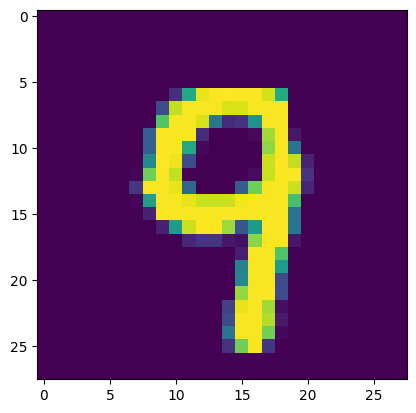

In [28]:
plt.imshow(dataset[520][0])
print("label: ", dataset[520][1])

That's cool. But we can't feed raw images directly to a neural network!

We need to use `transformations` to transform every samples of dataset when we try to access them. Let's create the same MNIST dataset, now with transformation:

In [29]:
import torchvision.transforms as transforms

In [30]:
dataset = MNIST(root="./data", download=True, train=True, transform=transforms.ToTensor())

In [31]:
# print(dataset[0])

What if we want to use a dataset that doesn't exist in `tochvision.datasets`?

#### 7.2 Dataloader

And finally, if we have a datasaet with many samples, we need to find a way to load the data in batches. One easy way is to use `torch.data.utils.DataLoader`. Let's assume we have a dataset, we can create a dataloader to randomly load data for us and return it as batches of arbitrary size:

In [32]:
from torch.utils.data import DataLoader

In [33]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [34]:
for batch in dataloader:
    print(batch[0].shape)
    print(batch[1])
    break

torch.Size([32, 1, 28, 28])
tensor([6, 4, 3, 3, 9, 4, 0, 5, 4, 4, 4, 7, 4, 0, 1, 1, 4, 3, 2, 8, 5, 9, 6, 9,
        7, 7, 8, 0, 6, 0, 8, 7])
